1. Data set reference link: https://www.consumerfinance.gov/data-
research/consumer-complaints/#download-the-data
File data source: https://files.consumerfinance.gov/ccdb/complaints.csv.zip
Problem statement:
Download the data from the file data source and provide possible data insights.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "complaints.csv"
complaints_data = pd.read_csv(file_path)

C:\Users\Sujay\AppData\Local\Temp\ipykernel_15072\885021048.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints_data = pd.read_csv(file_path)


In [7]:
# Explore the data
print("Dataset shape:", complaints_data.shape)
print("Columns:", complaints_data.columns)
print("First few rows:")
print(complaints_data.head())

Dataset shape: (5134967, 18)
Columns: Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')
First few rows:
  Date received                                            Product  \
0    2024-01-23  Credit reporting or other personal consumer re...   
1    2024-01-24  Credit reporting or other personal consumer re...   
2    2024-01-24  Credit reporting or other personal consumer re...   
3    2024-01-23  Credit reporting or other personal consumer re...   
4    2024-01-23  Credit reporting or other personal consumer re...   

        Sub-product                                 Issue  \
0  Credit reporting  Incorrect information on your report   
1  Credit reporting 

In [8]:
# Data cleaning
# Handling missing values
complaints_data.dropna(inplace=True)

In [13]:
# Data analysis
# Frequency of complaints over time
complaints_data['Date received'] = pd.to_datetime(complaints_data['Date received'])
complaints_by_date = complaints_data.groupby(complaints_data['Date received'].dt.to_period("M")).size()

# Types of complaints
top_complaints = complaints_data['Product'].value_counts().head(10)
print(top_complaints)

# Geographical analysis
top_states = complaints_data['State'].value_counts().head(10)
print(top_states)

# Response time analysis
complaints_data['Timely response?'] = complaints_data['Timely response?'].apply(lambda x: 1 if x == 'Yes' else 0)
response_rate = complaints_data['Timely response?'].mean()
print(response_rate)

# Complaint resolution
resolution_status = complaints_data['Consumer disputed?'].value_counts()
print(resolution_status)


Product
Debt collection    2983
Student loan        137
Name: count, dtype: int64
State
CA    395
TX    310
FL    280
GA    179
VA    137
NY    110
NC    107
MD    106
OH     97
AZ     91
Name: count, dtype: int64
0.0
Consumer disputed?
No     2454
Yes     666
Name: count, dtype: int64


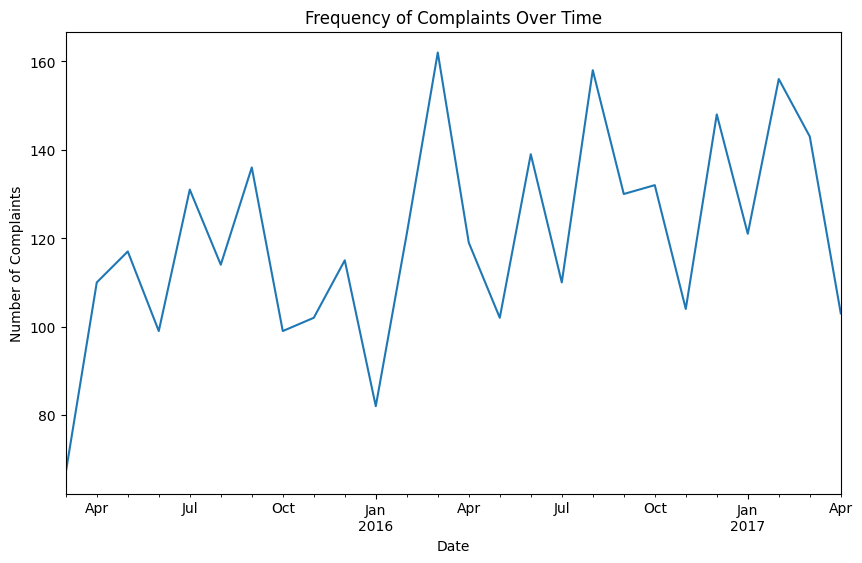

In [10]:
# Plot frequency of complaints over time
plt.figure(figsize=(10, 6))
complaints_by_date.plot(kind='line')
plt.title('Frequency of Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

2. Given an unsorted array of integers, find the length of the longest continuous
increasing subsequence (subarray). 
Example 1:
Input: [1,3,5,4,7]
Output: 3 
Example 2:
Input: [2,2,2,2,2]
Output: 1

In [16]:
def findLengthOfLCIS(nums):
    if not nums:
        return 0
    
    max_length = 1
    current_length = 1
    
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1
            
    return max_length

# Example usage:
nums_str = input("Enter the array of integers separated by spaces: ")
nums = list(map(int, nums_str.split()))

output = findLengthOfLCIS(nums)
print("Length of the longest continuous increasing subsequence:", output)


Length of the longest continuous increasing subsequence: 3


3. Given a list of non negative integers, arrange them such that they form the largest
number.
 
 Example 1:
 Input: [10,2]
 Output: &quot;210&quot;
 Example 2:
 
 Input: [3,30,34,5,9]
 Output: &quot;9534330&quot;

In [18]:
from functools import cmp_to_key

def largestNumber(nums):
    # Custom sorting function
    def compare(a, b):
        return int(b + a) - int(a + b)
    
    # Convert integers to strings for comparison
    nums_str = [str(num) for num in nums]
    
    # Sort the numbers using the custom comparison function
    nums_str.sort(key=cmp_to_key(compare))
    
    # Concatenate the sorted numbers to form the largest number
    largest_num = ''.join(nums_str)
    
    # Remove leading zeros if any
    return largest_num.lstrip('0') or '0'

#Example usage:
nums_str = input("Enter the list of non-negative integers separated by spaces: ")
nums = list(map(int, nums_str.split()))


output = largestNumber(nums)
print("Largest number formed:", output)


Largest number formed: 210


4. Store all the &quot;servlet-name&quot;, and &quot;servlet-class&quot; to a csv file from the attached
sample_json.json file using Python.

In [22]:
import json
import csv

# Read the JSON file
with open("DT A1 sample_json (1) (1).json", "r") as json_file:
    data = json.load(json_file)

# Extract "servlet-name" and "servlet-class" pairs
servlets = data["web-app"]["servlet"]

# Write the extracted data to a CSV file
with open("servlets.csv", "w", newline="") as csv_file:
    writer = csv.writer(csv_file)
    # Write header
    writer.writerow(["servlet-name", "servlet-class"])
    # Write data
    for servlet in servlets:
        writer.writerow([servlet["servlet-name"], servlet["servlet-class"]])

print("Data successfully written to servlets.csv")


Data successfully written to servlets.csv
